【知识目标】
1. 灰度处理
2. 腐蚀，膨胀
3. 阈值处理
4. 边缘检测
5. 霍夫直线检测 

【项目描述】

完成五子棋对弈，第一步首先要识别出棋盘，通过图像处理解析图像，利用霍夫变换的直线检测画出实际棋盘。

要识别的图像如下图：

![avatar](.\pic\weiqi.jpeg)

【识别棋盘思路】

1. 读取图片
2. 灰度处理
3. 阈值处理成黑白图
4. 使用膨胀和腐蚀去除干扰的无关边和噪声
5. 边缘检测
6. 霍夫变换识别直线
7. 绘制直线

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import copy

In [4]:
from matplotlib import pyplot as plt

读取图像OpenCV提供了方法cv2.imread来读取图像，该方法支持各种静态图像格式。该方法的语法格为：

    retval=cv2.imread(filename[,flags])

* retval 是返回值，其值就是读取到的图像，如果没有读取到图像，则返回“None”。
* filename表示要读取的图像名字。
* flags是读取标志。没有特殊要求可以不赋值，默认读取出的格式是BGR格式。

In [5]:
imagechessbord = cv2.imread("./pic/weiqi.jpeg")

In [6]:
gray = cv2.cvtColor(imagechessbord, cv2.COLOR_BGR2GRAY)

使用cv2.threshold（）方法进行阈值化处理，该函数的语法格式为：

    retval,dst=cv2.threshold（src,thresh,maxval,type）
    
* retval代表返回的阈值
* dst代表阈值分割结果图像，与原始图像具有相同的大小和类型。
* src代表要进行阈值分割的图像，可以是多通道的，8位或32位浮点型数值。
* thresh代表要设定的阈值
* maxval代表当type参数为THRESH_BINARY或者THRESH_BINARY_INV类型时，需要设定的最大值。

In [7]:
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

定义3\*3卷积核

In [8]:
kernel = np.ones((3, 3), np.uint8)

使用方法cv2.dilate（）实现对图像的膨胀操作，该函数的语法结构为,参数与腐蚀相同：

    dst=cv2.dilate（src,kernel[,anchor[,iterations[,borderType[,borderValue]]]]）

In [9]:
edged = cv2.dilate(thresh1, kernel)

使用方法cv2.erode（）实现腐蚀操作，其语法格式为：

    dst=cv2.erode（src,kernel[,anchor[,iterations[,borderType[,borderValue]]]]）
    
* dst是腐蚀后所输出的目标图像，该图像和原始图像具有同样的类型和大小
* src 是需要进行腐蚀的原始图像，图像的通道数可以是任意的。
* kernel 代表腐蚀操作时所采用的结构类型。它可以自定义生成，也可以通过函数cv2.getStructuringElement（）生成。
* anchor代表element结构中锚点的位置。该值默认为（-1,-1），在核的中心位置。
* iterations是腐蚀操作迭代的次数，该值默认为1，即只进行一次腐蚀操作。
* borderType代表边界样式，一般采用其默认值BORDER_CONSTANT。
* borderValue 是边界值，一般采用默认值。

In [10]:
edged = cv2.erode(edged, kernel)

In [11]:
edged = cv2.Canny(edged, 50, 150)

在pc上时，通常使用opencv的方法显示图像使用cv2.imshow()方法，该方法的语法格式为：

    None = cv2.imshow(winname,mat)

* winname为窗口名称
* mat为要显示的图像

由于需要在网页上显示所以需要使用到matplotlib库，显示图像也是使用imshow方法，和opencv的方法一样，传入图像对象就可以。

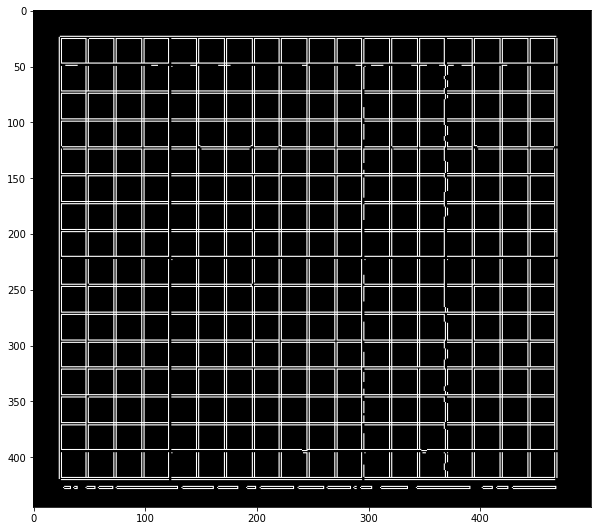

In [12]:
#cv2.imshow('Edges', edged)
plt.figure(figsize=(10,10))
plt.imshow(edged,cmap='gray')

使用方法cv2.HoughLinesP（）实现直线检测，该函数的语法结构为：

    lines=cv2.HoughLinesP(image,rho,theta,threshold,minLineLength,maxLineGap)

* image为输入的图像
* rho为以像素为单位的距离ρ的精度，通常情况使用精度1
* theta是角度θ的精度，一般情况下使用精度π/180，表示要搜索所有可能的角度。
* threshold是阈值。该值越小，判定出的直线就越多。
* minLineLength为接受直线的最小长度值，默认为0。
* maxLineGap为两点最大间隔。默认为0。
* lines是返回值为numpy.ndarray类型的元素构成，但不是直线的ρ和θ，而是两个直线点的坐标位置。

In [13]:
lines  =  cv2.HoughLinesP(edged,1,np.pi/180,1,minLineLength=160,maxLineGap=15)

In [14]:
image_result = np.ones(imagechessbord.shape)

画线OpenCV提供了方法cv2.line()用来绘制直线，该方法的语法格式为：

    img = cv2.line(img,pt1,pt2,color[,thickness[,lineType]])

* img 其值就是要绘制的图像载体，也可以成为画板
* pt1表示线段的第一个点，起点。
* pt2表示线段的第二个点，终点。
* color表示绘制形状的颜色。通常使用BGR模型表示。
* thickness表示线宽
* lineType 表示线条类型。通常使用默认即可。

In [15]:
for  line  in  lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(imagechessbord,(x1,y1),(x2,y2),(255,0,255),1)

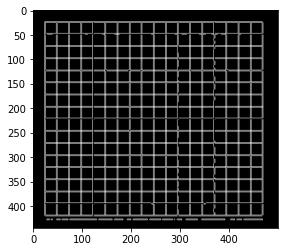

In [16]:
#cv2.imshow('Result', imagechessbord)
plt.imshow(edged,cmap='gray')


在opencv中需要使用等待按键功能来判断是否结束程序，使用cv2.waitKey()方法，当用户按下键盘后，该语句会被执行，并获取返回值。该方法的语法格式为：

    retval = cv2.waitKey([delay])

* retval 是返回值。如果没有按键被按下，则返回-1，如果有按键被按下，则返回按键的ASCII码。
* delay表示等待的时间，单位为毫秒，如果为-1或0比欧式无限等待，默认为0。

In [17]:
#cv2.waitKey()


在结束程序后需要释放资源，则使用cv2.destroyAllWindows()方法用来释放指定窗口，该方法的语法格式为：

    None = cv2.destroyAllWindows(winname)

*  winname为窗口名称

In [18]:
#cv2.destroyAllWindows()
#在网页里不用使用如上两个方法

In [19]:
def showresult(newlinex,newliney,imagechessbord):
    #看效果
    image_result = np.ones(imagechessbord.shape)
    countx = len(newlinex)
    county = len(newliney)
    for i in range(0, countx):
        x1, y1, x2, y2 = newlinex[i]
        cv2.line(image_result, (x1, y1), (x2, y2), (255, 0, 255), 1)

    for i in range(0, county):
        x1, y1, x2, y2 = newliney[i]
        cv2.line(image_result, (x1, y1), (x2, y2), (255, 0, 255), 1)
    #cv2.imshow('Result', image_result)
    #cv2.waitKey()
    #cv2.destroyAllWindows()
    plt.figure(figsize=(10,10))
    plt.imshow(image_result, cmap='gray')

通过最后的效果图可以看出实际识别出来的直线多，并且有些直线没有贯穿整个棋盘，所以还需要把多余的线处理掉，修复过短的直线。

定义保存交点数组，行和列线的数组，使用HoughLinesP识别直线

In [20]:
crossArr = []
linesx = []
linesy = []

lines = cv2.HoughLinesP(edged, 1, np.pi / 180, 1, minLineLength=160, maxLineGap=15)

根据识别的直线列表，分别保存行和列线

In [21]:
# 提取出行和列
for line in lines:
    x1, y1, x2, y2 = line[0]
    if x1 == x2:
        linesy.append(line[0])

    elif y1 == y2:
        linesx.append(line[0])

In [22]:
print("row:",linesx)
print("column:",linesy)

row: [array([ 26,  47, 466,  47], dtype=int32), array([ 26,  72, 466,  72], dtype=int32), array([ 27, 196, 468, 196], dtype=int32), array([ 27, 247, 466, 247], dtype=int32), array([ 27, 173, 466, 173], dtype=int32), array([ 26, 297, 466, 297], dtype=int32), array([ 26, 220, 466, 220], dtype=int32), array([ 26, 148, 465, 148], dtype=int32), array([ 26, 122, 466, 122], dtype=int32), array([ 26, 369, 466, 369], dtype=int32), array([ 27, 418, 465, 418], dtype=int32), array([ 26,  99, 465,  99], dtype=int32), array([ 27, 198, 468, 198], dtype=int32), array([ 27, 171, 466, 171], dtype=int32), array([ 26, 295, 466, 295], dtype=int32), array([ 26, 371, 466, 371], dtype=int32), array([ 26, 319, 466, 319], dtype=int32), array([ 26,  97, 465,  97], dtype=int32), array([ 26, 270, 466, 270], dtype=int32), array([ 29, 124, 465, 124], dtype=int32), array([ 28, 344, 465, 344], dtype=int32), array([ 26,  25, 466,  25], dtype=int32), array([ 26, 272, 466, 272], dtype=int32), array([ 26, 321, 466, 321], 

把行列表根据坐标从左到右排序，采用冒泡排序方式坐标值小的在前，大的在后，为了后续计算交点

In [23]:
# 行和列进行排序
countx = len(linesx)

for i in range(countx):  # type: int
    for j in range(0, countx - i - 1):
        if linesx[j][1] > linesx[j + 1][1]:
            linesx[j], linesx[j + 1] = linesx[j + 1], linesx[j]

firstypos = linesx[0][1]#保存第一条行线的y值
finalypos = linesx[countx - 1][1]#保存最后一条行线的y值

county = len(linesy)

for i in range(county):
    for j in range(0, county - i - 1):
        if linesy[j][0] > linesy[j + 1][0]:
            linesy[j], linesy[j + 1] = linesy[j + 1], linesy[j]

firstxpos = linesy[0][0]#保存第一条列线的x值
finalxpos = linesy[county - 1][0]#保存最后一条列线的x值

In [24]:
print("sorted row:",linesx)
print("sorted column:",linesy)

sorted row: [array([105,  23, 468,  23], dtype=int32), array([ 26,  25, 466,  25], dtype=int32), array([ 26,  47, 466,  47], dtype=int32), array([ 26,  72, 466,  72], dtype=int32), array([ 26,  74, 466,  74], dtype=int32), array([ 26,  97, 465,  97], dtype=int32), array([ 26,  99, 465,  99], dtype=int32), array([ 26, 122, 466, 122], dtype=int32), array([ 29, 124, 465, 124], dtype=int32), array([ 26, 146, 465, 146], dtype=int32), array([ 26, 148, 465, 148], dtype=int32), array([ 27, 171, 466, 171], dtype=int32), array([ 27, 173, 466, 173], dtype=int32), array([ 27, 196, 468, 196], dtype=int32), array([ 27, 198, 468, 198], dtype=int32), array([ 26, 220, 466, 220], dtype=int32), array([ 27, 245, 466, 245], dtype=int32), array([ 27, 247, 466, 247], dtype=int32), array([ 26, 270, 466, 270], dtype=int32), array([ 26, 272, 466, 272], dtype=int32), array([ 26, 295, 466, 295], dtype=int32), array([ 26, 297, 466, 297], dtype=int32), array([ 26, 319, 466, 319], dtype=int32), array([ 26, 321, 466,

因为有邻近的线，所以需要去掉一个只保留一条线作为棋盘线，根据图像大概两条间距会小于5像素，所以相邻的两条线如果间距小于5像素，就保留前一条，也可以保留后一条。如果相邻的两条线间距大于5，再判断后一条线与相邻线的间距，如果后一条线的间距大于5就保留相邻线，否则抛弃。

In [25]:
newlinex = []
index = 0
loop = 3
count = len(linesx)

while index <= count - 1:
    newlinex.append(linesx[index])
    if linesx[index + 1][1] - linesx[index][1] <= 5:
        index += 2
    else:
        index += 1
    if index + 1 == count:  # 如果是前一条边是倒数第2条边或第3条边的情况不会漏掉最后一条边
        newlinex.append(linesx[index])
    if index + 1 >= count:
        if loop > 0:
            index = 0
            loop -= 1
            linesx = copy.deepcopy(newlinex)
            newlinex = []
            count = len(linesx)
        else:
            break
        
newliney = []
count = len(linesy)
index = 0
loop = 3
while index <= count - 1:
    newliney.append(linesy[index])
    if linesy[index + 1][0] - linesy[index][0] <= 5:
        index += 2
    else:
        index += 1
    if index + 1 == count:  # 如果是前一条边是倒数第2条边或第3条边的情况不会漏掉最后一条边
        newliney.append(linesy[index])
    if index + 1 >= count:
        if loop > 0:
            index = 0
            loop -= 1
            linesy = copy.deepcopy(newliney)
            newliney = []
            count = len(linesy)
        else:
            break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


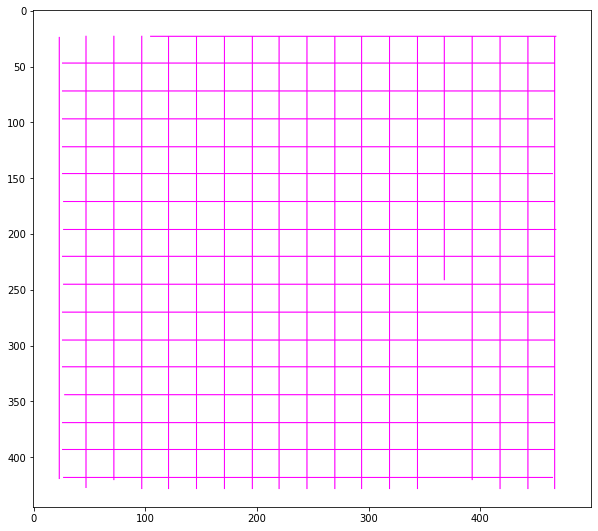

In [26]:
#看效果
showresult(newlinex,newliney,imagechessbord)

通过效果可以看到有线线段很短，没有闭合。所以还需要检查去除多余的线并延长过短的线段

In [27]:
# 根据长度和宽度，延长过短的线段
countx = len(newlinex)
for i in range(0, countx):
    x1, y1, x2, y2 = newlinex[i]
    # if( abs(x1 -x2) < finalXPos - firstXPos):
    newlinex[i][0] = firstxpos#修改第一个点的x轴值x1
    newlinex[i][2] = finalxpos#修改最后一个点的x轴值x2

county = len(newliney)
for i in range(0, county):
    x1, y1, x2, y2 = newliney[i]
    # if( abs(y1 -y2) < finalYPos - firstYPos):
    newliney[i][1] = firstypos#修改第一个点的y轴值y1
    newliney[i][3] = finalypos#修改最后一个点的y轴值y2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


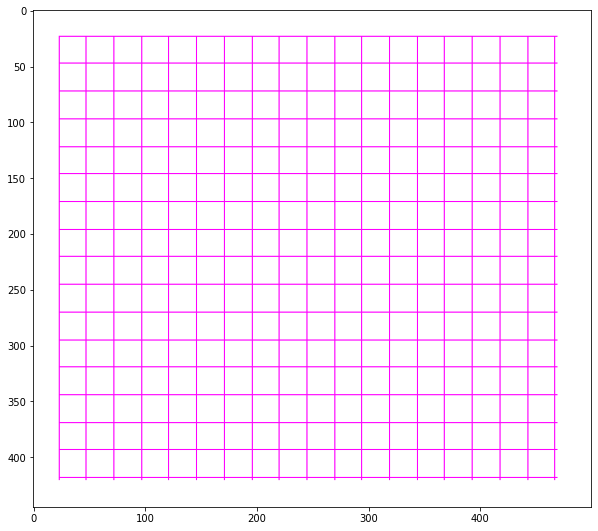

In [28]:
#看效果
showresult(newlinex,newliney,imagechessbord)

In [29]:
#根据线段的坐标计算所有交点并保存在变量crossArr中
for i in range(0, countx):
    temparr = []
    for j in range(0, county):
        temparr.append((newliney[j][0], newlinex[i][1]))
    # cv2.circle(imageResult,(newLineY[j][0],newLineX[i][1]),2,(0,0,255),1)
    crossArr.append(temparr)

In [30]:
# 根据行的最后一个坐标和列的最后一个坐标，确定行和列的终点。
finalxpos = crossArr[0][county - 1][0]
finalypos = crossArr[countx - 1][0][1]

# 更新把最后行交点和最后一列的交点做为棋盘的终线
countx = len(newlinex)
for i in range(0, countx):
    x1, y1, x2, y2 = newlinex[i]
    # if( abs(x1 -x2) < finalXPos - firstXPos):
    newlinex[i][0] = firstxpos
    newlinex[i][2] = finalxpos

county = len(newliney)
for i in range(0, county):
    x1, y1, x2, y2 = newliney[i]
    # if( abs(y1 -y2) < finalYPos - firstYPos):
    newliney[i][1] = firstypos
    newliney[i][3] = finalypos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


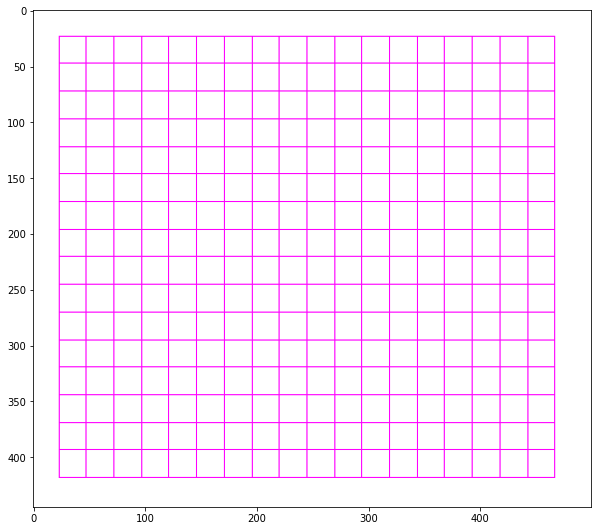

In [31]:
#看效果
showresult(newlinex,newliney,imagechessbord)